In [1]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.

# Deep Learning

import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.
from sklearn.model_selection import train_test_split

In [2]:
# Leemos el archivo con los datos del repositorio

df_central = pd.read_csv("https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv")
df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [3]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25066 entries, 0 to 25065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25066 non-null  int64  
 1   Fecha          25066 non-null  object 
 2   Period         25066 non-null  int64  
 3   PREVISION      25066 non-null  float64
 4   E_SIMEL        25066 non-null  float64
 5   DESVIO         25066 non-null  float64
 6   f_PREV_HIGH    25066 non-null  int64  
 7   f_PREV_LOW     25066 non-null  int64  
 8   f_RUN          25066 non-null  int64  
 9   Dia_Semana     25066 non-null  int64  
 10  Es_fin_semana  25066 non-null  bool   
 11  Año            25066 non-null  int64  
 12  Mes            25066 non-null  int64  
 13  Día            25066 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(1)
memory usage: 2.5+ MB


In [4]:
# Eliminamos las columnas que no utilizaremos para el modelado

df_central.drop(['Unnamed: 0', 'f_PREV_LOW'], axis=1, inplace=True)

# Convertimos la columna 'Fecha' a Datetime

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Convertimos la columna 'f_RUN' a Booleano

df_central['f_RUN'] = df_central['f_RUN'].astype(bool)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,0.0,0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,0.0,0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,0.0,0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,0.0,0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,0.0,0,False,4,False,2021,1,1


In [5]:
df_central.head(24)

,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.000,0.000,0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.000,0.000,0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.000,0.000,0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.000,0.000,0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.000,0.000,0,False,4,False,2021,1,1
5,2021-01-01,6,0.0,0.000,0.000,0,False,4,False,2021,1,1
6,2021-01-01,7,0.0,0.000,0.000,0,False,4,False,2021,1,1
7,2021-01-01,8,0.0,0.000,0.000,0,False,4,False,2021,1,1
8,2021-01-01,9,0.0,0.000,0.000,0,False,4,False,2021,1,1
9,2021-01-01,10,0.0,0.000,0.000,0,False,4,False,2021,1,1


In [6]:
# Dividimos el DataFrame en dos: el primero para hacer el entrenamiento y prueba del modelo de predicción
# y el segundo para hacer las imputaciones, reentrenos de modelos y hacer las pruebas de predicción como si fuera un ejemplo real de datos nuevos.

df_inicio = df_central[df_central['Fecha'] <= '2023-10-31']
df_final = df_central[df_central['Fecha'] >= '2023-11-05']

In [7]:
# Con que ya tenemos columnas específicas que marcan los días, meses y años, eliminamos de los dos DataFrames
# la columna 'Fecha' para poder utilizar modelos de Random Forest y Gradient Boosting


df_inicio = df_inicio.drop('Fecha', axis=1)
df_final = df_final.drop('Fecha', axis=1)

In [8]:
X_inicio = df_inicio.drop('E_SIMEL', axis=1)  # Excluimos la varible objetivo E_SIMEL del conjunto de entrenamiento 
y_inicio = df_inicio['E_SIMEL']  # Definimos la variable objetivo E_SIMEL del conjunto de prueba


# Dividimos el conjunto de datos en entrenamiento (80%) y prueba (20%)

X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(X_inicio, y_inicio, test_size=0.2, random_state=42)


In [9]:
# Definimos el modelo de Gradient Boosting

gb_r = GradientBoostingRegressor(random_state=42)

# Definimos en qué parámetros se basará la prueba
param_grid = {
    'n_estimators': [100, 200, 300],  # numero de árboles
    'max_depth': [10, 20, 30],        # máxima profundidad de los árboles
    #
}

# Configuramos el  GridSearchCV para la búsqueda de los mejores Hiperparámetros

grid_search = GridSearchCV(estimator=gb_r, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ejecutamos la búsqueda

grid_search.fit(X_train_inicio, y_train_inicio)

# Imprimimos para visualizar los Hiperparámetros y la puntuación

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores parámetros: {'max_depth': 10, 'n_estimators': 300}
Mejor puntuación: -0.11402044530941763


In [10]:
# Creamos el modelo de GradientBoostingRegressor

gb_r_optimizado = GradientBoostingRegressor(n_estimators=300, max_depth=10, random_state=42)

# Entrenamos el modelo con los resultados de los mejores Hiperparámetros

gb_r_optimizado.fit(X_train_inicio, y_train_inicio)


GradientBoostingRegressor(max_depth=10, n_estimators=300, random_state=42)

In [11]:
# Hacemos las predicciones en el conjunto de prueba

y_pred_test = gb_r_optimizado.predict(X_test_inicio)

# Calculamos MSE y R²

mse_test = mean_squared_error(y_test_inicio, y_pred_test)
r2_test = r2_score(y_test_inicio, y_pred_test)

print("MSE en el conjunto de prueba:", mse_test)
print("R² en el conjunto de prueba:", r2_test)


MSE en el conjunto de prueba: 0.06773341913795992
R² en el conjunto de prueba: 0.999762597914289


In [12]:
# Preparamos los hiperparámetros para entrenar el modelo para el imputador

estimador_gb = GradientBoostingRegressor(
    n_estimators=100,        # número de árboles de desición
    max_depth=10,            # profundidad máxima de cada árbol 
    min_samples_split=4,     # numero de muestras necesarias para dividir un nodo interno 
    min_samples_leaf=2,      # número mínimo de hojas
    max_features='sqrt',     # número máximo de características para la mejor división: se debe considerar la raïz cuadrada del número total de características
)

# Creamos el imputador MICE

mice_imputer = IterativeImputer(estimator=estimador_gb, random_state=42)

# Entrenamos el imputador con todas las columnas disponibles de df_inicio menos con la variable objetivo E_SIMEL

mice_imputer.fit(df_inicio[['Period', 'PREVISION', 'DESVIO','f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



IterativeImputer(estimator=GradientBoostingRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=4),
                 random_state=42)

In [13]:
# Ahora empezamos con el proceso de predicciones para el conjunto de datos que separamos al principio: df_final


# seleccionamos las filas del 05-11-2023

df_final_05_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]

# Para imputar valores a la columna f_RUN, creamos una variable con los datos del día 5
# donde quitamos la variable objetivo E_SIMEL y convertimos la variable para imputar f_RUN a valores nulos (NaN).

df_final_05_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_05_11_para_imputar[['DESVIO', 'f_PREV_HIGH','f_RUN']] = np.nan  

# Tal como comentamos anteriormente, en el momento de entrenar el modelo para el imputador, utilizamos todas las variables dando al imputador
# valores para todas ellas. En este caso cogemos los valores para la columnas 'DESVIO', 'f_PREV_HIGH' y 'f_RUN' e imputamos los valores en el Dataframe de la predicción.

valores_imputados = mice_imputer.transform(df_final_05_11_para_imputar[['Period', 'PREVISION','DESVIO',  'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Elegimos las columnas correspondientes del array que corresponden a las columnas que volemos imputar.

valores_imputados_DESVIO = valores_imputados[:, 2]
valores_imputados_f_PREV_HIGH = valores_imputados[:, 3]  
valores_imputados_f_RUN = valores_imputados[:, 4]  

# Convertimos a booleano según el umbral elegido.

valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)
valores_imputados_f_PREV_HIGH_boolean = np.where(valores_imputados_f_PREV_HIGH > 0, True, False)

# Actualizamos las columnas de df_final_05_11 con los valores imputados

df_final_05_11.loc[df_final_05_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean
df_final_05_11.loc[df_final_05_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean
df_final_05_11.loc[df_final_05_11.index, 'DESVIO'] = valores_imputados_DESVIO

# Preparamos el conjunto de datos del día 5, excluyendo la variable objetivo E_SIMEL y procedemos a hacer la predicción con el modelo
# de Gradient Boosting entrenado

caracteristicas_para_prediccion = df_final_05_11.drop('E_SIMEL', axis=1)  

predicted_e_simel_05_11 = gb_r_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_05_11 = np.maximum(predicted_e_simel_05_11, 0)

# Creamos un Dataframe para almacenar los resultados de la predicción junto a otras variables relevantes para poder visualizarlos.

df_predicciones_05_11 = df_final_05_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_05_11['predicted_E_SIMEL'] = predicted_e_simel_05_11

# Mostramos el Dataframe

# df_predicciones_05_11.head()




C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\2267054332.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True  True  True  True  True  True False  True  True False
 False False False  True False False False  True  True  True  True  True]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final_05_11.loc[df_final_05_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean


In [14]:
"""
Como en los anteriores notebooks, calculamos el sumatorio de las columnas E_SIMEL, predicted_E_SIMEL y PREVISION
para hacer la comparación entre ellas y poder sacar el porcentaje de desviación.
En caso de división por 0 devolvemos un valor especial para no obtener un error.
Primero calculamos el porcentaje de desviación de la predicción y posteriormente
calculamos la desviacion porcentual de la previsión

"""

suma_real_05 = df_predicciones_05_11['E_SIMEL'].sum()
suma_predicha_05 = df_predicciones_05_11['predicted_E_SIMEL'].sum()
suma_prevision_05 = df_predicciones_05_11['PREVISION'].sum()


if suma_real_05 != 0:
    desviacion_porcentual = 100 * (suma_predicha_05 - suma_real_05) / suma_real_05
else:
    desviacion_porcentual = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error



if suma_real_05 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_05 - suma_real_05) / suma_real_05
else:
    desviacion_porcentual_prevision = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error

print("Suma real: ", suma_real_05)
print("Suma predicha: ", suma_predicha_05)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_05)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")



Suma real:  15.937000000000001
Suma predicha:  1.3399308142777255
Desviación porcentual:  -91.59232719911071 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [15]:
# Una vez tenemos la primera predicción, actualizamos df_inicio con los datos del día 5. Así estamos simulando como sería
# el proceso de predicción en tiempo real

datos_dia_5 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]
df_inicio_actualizado = pd.concat([df_inicio, datos_dia_5])

# Reentrenamos el modelo con la actualización de los datos

X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado['E_SIMEL']
gb_r_optimizado.fit(X_train_actualizado, y_train_actualizado)

GradientBoostingRegressor(max_depth=10, n_estimators=300, random_state=42)

In [16]:
# Al igual que con el modelo de Gradient Boosting, también entrenamos el imputador con los nuevos datos del día 5
# Proceso que vamos a seguir a lo largo de todos los días

mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION',  'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=GradientBoostingRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=4),
                 random_state=42)

In [17]:
# Hacemos el mimso proceso que hemos hecho para el día 6, ahora con los datos del día 6
# - Imputación de f_RUN
# - Predicción de E_SIMEL para el día 6

df_final_06_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]

df_final_06_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_06_11_para_imputar[['DESVIO', 'f_PREV_HIGH','f_RUN']] = np.nan  


valores_imputados = mice_imputer.transform(df_final_06_11_para_imputar[['Period', 'PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])


valores_imputados_DESVIO = valores_imputados[:, 2]
valores_imputados_f_PREV_HIGH = valores_imputados[:, 3]  
valores_imputados_f_RUN = valores_imputados[:, 4]  


valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)
valores_imputados_f_PREV_HIGH_boolean = np.where(valores_imputados_f_PREV_HIGH > 0, True, False)


df_final_06_11.loc[df_final_06_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean
df_final_06_11.loc[df_final_06_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean
df_final_06_11.loc[df_final_06_11.index, 'DESVIO'] = valores_imputados_DESVIO


caracteristicas_para_prediccion = df_final_06_11.drop('E_SIMEL', axis=1)  


predicted_e_simel_06_11 = gb_r_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_06_11 = np.maximum(predicted_e_simel_06_11, 0)

df_predicciones_06_11 = df_final_06_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_06_11['predicted_E_SIMEL'] = predicted_e_simel_06_11


# df_predicciones_06_11.head()


# Iremos guardando las predicciones de todos los días en las variables:  df_predicciones_dia_mes para poder sacar
# al final las métricas

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\3391934848.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final_06_11.loc[df_final_06_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean


In [18]:
# Sumatorio y porcentajes de desviación


suma_real_06 = df_predicciones_06_11['E_SIMEL'].sum()
suma_predicha_06 = df_predicciones_06_11['predicted_E_SIMEL'].sum()
suma_prevision_06 = df_predicciones_06_11['PREVISION'].sum()


if suma_real_06 != 0:
    desviacion_porcentual = 100 * (suma_predicha_06 - suma_real_06) / suma_real_06
else:
    desviacion_porcentual = float('inf')  



if suma_real_06 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_06 - suma_real_06) / suma_real_06
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_06)
print("Suma predicha: ", suma_predicha_06)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_06)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.542
Suma predicha:  157.17282240437277
Desviación porcentual:  168.47873732426763 %
Suma previsión:  159.4
Desviación porcentual:  172.2831471422227 %


In [19]:
# Creamos un función para agilizar el proceso de actualización, reentreno de los modelos, imputación, predicción y cálculo de las métricas

def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente,  mes, año, df_inicio_actualizado, df_final, modelo_gb, imputador):
    """
    Función para actualizar el conjunto de entrenamiento con los datos reales de un día específico,
    realizar la imputación para el día siguiente y predecir los valores de E_SIMEL para ese día.

    Args:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    dia_siguiente (int): Datos del día que queremos hacer las imputaciones y la predicción
    mes (int): Mes del día actual.
    año (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_rf (RandomForestRegressor): Modelo de Random Forest entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # Actualización de df_actualizado con los datos de dia_actual

    datos_dia_actual = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenamos los modelos

    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_gb.fit(X_train_actualizado, y_train_actualizado)
    imputador.fit(df_inicio_actualizado[['Period', 'PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    # Imputación de valores en las columnas 'DESVIO', 'f_PREV_HIGH' y 'f_RUN'
    
    df_dia_siguiente = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['DESVIO','f_PREV_HIGH','f_RUN']] = np.nan  # Convertir todos los valores  a NaN

    
    valores_imputados = imputador.transform(df_dia_siguiente_para_imputar)

    df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]    
    df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 4] > 0.2, True, False)  

    # Preparación para la predicción y realizarla

    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    predicted_e_simel = modelo_gb.predict(X_prediccion)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # Dataframe con los resultados con elección de algunas columnas

    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # Cálculo de las métricas

    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

 



In [20]:
# Llamamos a la función
dia_actual = 6    # Actualización de datos con los que reentrenamos los modelos
dia_siguiente = 7    # Preparación de datos para la imputación y predicción
df_predicciones_07_11, df_inicio_actualizado, mse_07_11, r2_07_11, mae_07_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_07_11, "R²:", r2_07_11, "MAE:", mae_07_11)

MSE: 35.015519807944294 R²: 0.12156680082208504 MAE: 3.105192134234485


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [21]:
# Y como en la predicción anterior calculamos los sumatorios y los porcentajes de desviación

suma_real_07_11 = df_predicciones_07_11['E_SIMEL'].sum()
suma_predicha_07_11 = df_predicciones_07_11['predicted_E_SIMEL'].sum()
suma_prevision_07_11 = df_predicciones_07_11['PREVISION'].sum()


if suma_real_07_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_07_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_07_11)
print("Suma predicha: ", suma_predicha_07_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_07_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  67.97999999999999
Suma predicha:  32.64713816756907
Desviación porcentual:  -51.975377805870735 %
Suma previsión:  24.0
Desviación porcentual:  -64.6954986760812 %


In [22]:
# Llamamos a la función. Actualización de datos reales del día 7 para reentrenar los modelos
# Preparación de los datos del día posterior, en este caso del día 8, para la imputación y predicción

dia_actual = 7
dia_siguiente = 8

df_predicciones_08_11, df_inicio_actualizado, mse_08_11, r2_08_11, mae_08_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_08_11, "R²:", r2_08_11, "MAE:", mae_08_11)

MSE: 3.264984283149914 R²: -0.07488904097728244 MAE: 0.5106088815819647


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [23]:
# Sumatorios y porcentajes

suma_real_08_11 = df_predicciones_08_11['E_SIMEL'].sum()
suma_predicha_08_11 = df_predicciones_08_11['predicted_E_SIMEL'].sum()
suma_prevision_08_11 = df_predicciones_08_11['PREVISION'].sum()


if suma_real_08_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_08_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_08_11)
print("Suma predicha: ", suma_predicha_08_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_08_11)

Suma real:  11.296999999999999
Suma predicha:  0.9690803737289753
Desviación porcentual:  -91.42179008826258 %
Suma previsión:  0.0


In [24]:
# Seguimos con el mismo proceso anterior. Llamamos a la función con los días específicos que queremos actualizar, imputar y predecir.

dia_actual = 8
dia_siguiente = 9

df_predicciones_09_11, df_inicio_actualizado, mse_09_11, r2_09_11, mae_09_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_09_11, "R²:", r2_09_11, "MAE:", mae_09_11)

MSE: 19.238272530474582 R²: 0.7942887219058369 MAE: 1.8652440676847795


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [25]:
# Sumatorios y procentajes

suma_real_09_11 = df_predicciones_09_11['E_SIMEL'].sum()
suma_predicha_09_11 = df_predicciones_09_11['predicted_E_SIMEL'].sum()
suma_prevision_09_11 = df_predicciones_09_11['PREVISION'].sum()


if suma_real_09_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_09_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_09_11)
print("Suma predicha: ", suma_predicha_09_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_09_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  102.43700000000001
Suma predicha:  128.8245829038541
Desviación porcentual:  25.759816183463084 %
Suma previsión:  127.30000000000001
Desviación porcentual:  24.271503460663627 %


In [26]:
# Llamamos a la función
dia_actual = 9
dia_siguiente = 10

df_predicciones_10_11, df_inicio_actualizado, mse_10_11, r2_10_11, mae_10_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_10_11, "R²:", r2_10_11, "MAE:", mae_10_11)

MSE: 11.448791349186202 R²: 0.5276499724999826 MAE: 1.5640101494950374


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [27]:
# Sumatorios y porcentajes

suma_real_10_11 = df_predicciones_10_11['E_SIMEL'].sum()
suma_predicha_10_11 = df_predicciones_10_11['predicted_E_SIMEL'].sum()
suma_prevision_10_11 = df_predicciones_10_11['PREVISION'].sum()


if suma_real_10_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_10_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_10_11)
print("Suma predicha: ", suma_predicha_10_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_10_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.955
Suma predicha:  84.4650410576698
Desviación porcentual:  43.270360542226776 %
Suma previsión:  112.6
Desviación porcentual:  90.99313035365958 %


In [28]:
# Llamamos a la función

dia_actual = 10
dia_siguiente = 13

df_predicciones_13_11, df_inicio_actualizado, mse_13_11, r2_13_11, mae_13_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_13_11, "R²:", r2_13_11, "MAE:", mae_13_11)

MSE: 75.97188869291267 R²: 0.12922453992361327 MAE: 3.6475323778137074


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [29]:
# Sumas y porcentajes

suma_real_13_11 = df_predicciones_13_11['E_SIMEL'].sum()
suma_predicha_13_11 = df_predicciones_13_11['predicted_E_SIMEL'].sum()
suma_prevision_13_11 = df_predicciones_13_11['PREVISION'].sum()

if suma_real_13_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_13_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_13_11)
print("Suma predicha: ", suma_predicha_13_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_13_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  107.141
Suma predicha:  21.89541538323979
Desviación porcentual:  -79.56392475033853 %
Suma previsión:  20.900000000000002
Desviación porcentual:  -80.492995211917 %


In [30]:
# Llamamos a la función
dia_actual = 13
dia_siguiente = 14

df_predicciones_14_11, df_inicio_actualizado, mse_14_11, r2_14_11, mae_14_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_14_11, "R²:", r2_14_11, "MAE:", mae_14_11)

MSE: 17.289055788937333 R²: 0.8163624032718924 MAE: 2.111294440921514


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [31]:
# Sumatorios y porcentajes

suma_real_14_11 = df_predicciones_14_11['E_SIMEL'].sum()
suma_predicha_14_11 = df_predicciones_14_11['predicted_E_SIMEL'].sum()
suma_prevision_14_11 = df_predicciones_14_11['PREVISION'].sum()

if suma_real_14_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_14_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_14_11)
print("Suma predicha: ", suma_predicha_14_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_14_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  112.33099999999999
Suma predicha:  93.23265653723051
Desviación porcentual:  -17.00184585089555 %
Suma previsión:  120.5
Desviación porcentual:  7.272257880727503 %


In [32]:
# Llamamos a la función

dia_actual = 14
dia_siguiente = 15

df_predicciones_15_11, df_inicio_actualizado, mse_15_11, r2_15_11, mae_15_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_15_11, "R²:", r2_15_11, "MAE:", mae_15_11)

MSE: 53.00171409291686 R²: -0.036184247732024444 MAE: 3.95990982406965


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_63704\931828884.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [33]:
# Sumas y porcentajes

suma_real_15_11 = df_predicciones_15_11['E_SIMEL'].sum()
suma_predicha_15_11 = df_predicciones_15_11['predicted_E_SIMEL'].sum()
suma_prevision_15_11 = df_predicciones_15_11['PREVISION'].sum()

if suma_real_15_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_15_11 - suma_real_15_11) / suma_real_15_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_15_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_15_11 - suma_real_15_11) / suma_real_15_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_15_11)
print("Suma predicha: ", suma_predicha_15_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_15_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  88.333
Suma predicha:  112.27318364424977
Desviación porcentual:  27.102196964044893 %
Suma previsión:  131.89999999999998
Desviación porcentual:  49.32131819365354 %


In [34]:
# Concatenamos todos los Dataframes que contienen las prediccions, previsiones y datos reales para calcular las méstricas en conjunto

df_predicciones_totales = pd.concat([df_predicciones_05_11, df_predicciones_06_11, df_predicciones_07_11, 
                                     df_predicciones_08_11, df_predicciones_09_11,df_predicciones_10_11, 
                                     df_predicciones_13_11, df_predicciones_14_11, df_predicciones_15_11])



In [35]:
# Cálculo de las métricas para ver si nos indican si mejoran los errores entren la predicción (predicted_E_SIMEL), previsión (PREVISION)y producción real(E_SIMEL)

def calcular_metricas(df):
    mae = mean_absolute_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    mse = mean_squared_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    r2 = r2_score(df['E_SIMEL'], df['predicted_E_SIMEL'])
    return mae, mse, r2

# Métricas para la predicciones

mae_pred, mse_pred, r2_pred = calcular_metricas(df_predicciones_totales)

# Cambiamos la columna de predicción por la de previsión

df_previsiones = df_predicciones_totales.copy()
df_previsiones['predicted_E_SIMEL'] = df_previsiones['PREVISION']

# Métricas para la previsión

mae_prev, mse_prev, r2_prev = calcular_metricas(df_previsiones)

# Visualizamos los resultados

print("MAE Predicciones: ", mae_pred)
print("MSE Predicciones: ", mse_pred)
print("R² Predicciones: ", r2_pred)
print("MAE Previsiones: ", mae_prev)
print("MSE Previsiones: ", mse_prev)
print("R² Previsiones: ", r2_prev)


MAE Predicciones:  2.393822124073529
MSE Predicciones:  31.026421327478513
R² Predicciones:  0.3865583441289422
MAE Previsiones:  2.3999490740740743
MSE Previsiones:  35.93822944907407
R² Previsiones:  0.2894440918718205


In [36]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum()
sumas_totales_predicciones = df_predicciones_totales['predicted_E_SIMEL'].sum()
sumas_previsiones = df_predicciones_totales['PREVISION'].sum()


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = abs(sumas_previsiones - suma_e_simel)


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")

diferencia = diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {-diferencia} unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

Suma de los valores en la columna E_SIMEL: 622.953
Suma de las predicciones: 632.8198512861925
Suma de las previsiones : 696.6
Diferencia entre predicciones totales y E_SIMEL total: 9.866851286192514
Diferencia entre previsiones y E_SIMEL total: 73.64700000000005
La predicción es MEJOR que la previsión en: 63.780148713807534 unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


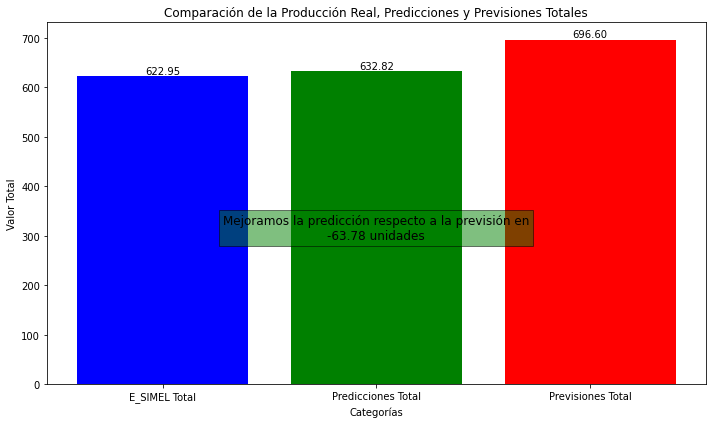

In [37]:
# Valores que cogemos para el gráfico

categorias = ['E_SIMEL Total', 'Predicciones Total', 'Previsiones Total']
valores = [suma_e_simel, sumas_totales_predicciones, sumas_previsiones]

# Creamos un gráfico de barras

plt.figure(figsize=(10, 6))
barra = plt.bar(categorias, valores, color=['blue', 'green', 'red'])

# Añadimos las etiqutas

for rect in barra:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Título del gráfico y ponemos las etiquteas a cada barra
    
plt.title('Comparación de la Producción Real, Predicciones y Previsiones Totales')
plt.xlabel('Categorías')
plt.ylabel('Valor Total')


# Ubicamos el texto de la diferencia

pos_y = valores[1] / 2
pos_x = categorias[1]
plt.text(pos_x, pos_y, f'Mejoramos la predicción respecto a la previsión en\n{diferencia:.2f} unidades', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='green', alpha=0.5))
plt.tight_layout()
plt.show()